# Lending Club Case Study

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

### Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company



###  Conclusion

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as - 
1. Denying the loan
2. Reducing the amount of loan
3. Lending (to risky applicants) at a higher interest rate, etc.

# Step 1 - Define Data Source and load data in a data frame which can be used for further analysis.


## Step 1a - Data Source

Load the data provided for Lending Club case study.


In [1]:
# Load dataset from github
# ! rm -rf ml-datasets
# ! git clone https://github.com/prateekgithub/ml-datasets.git
# ! ls ml-datasets/lending_club_case_study

## Step 1b - Data Loading
Load provided data to data frame df_loan_records for further processing.

In [2]:
# Import required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#set display format 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

assignmentDir="/Users/sundar.shankar/Documents/PG-IIITB/datasets/assignment-2/"
dataFile= assignmentDir + "loan.csv"
#Load provided data to data frame
# df_loan_records = pd.read_csv("ml-datasets/lending_club_case_study/loan.csv", low_memory=False, encoding="UTF-8")
df_loan_records = pd.read_csv(dataFile,low_memory=False, encoding="UTF-8")
df_loan_records.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


# Step 2 - Data Understanding & Cleaning
Clean the data based on missing values, outliers, data redundancies etc.

## Step 2a - Remove columns with all values as null or empty.

In [3]:
df_loan_records.dropna(axis='columns', how='all', inplace=True)
print(df_loan_records.shape)
df_loan_records.head()

(39717, 57)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


## Step 2b  - Drop columns with only one distinct value as it will not provide meaningful data for analysis.

In [4]:
df_loan_records = df_loan_records[[col for col in list(df_loan_records) if len(df_loan_records[col].unique()) > 1]]
print(df_loan_records.shape)
df_loan_records.head()

(39717, 51)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,0.00,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,0.00,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,0.00,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,0.00,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,0.00,0.00,0.00


## Step 2c - Drop columns with values only either 0 or NaN(null)

In [5]:
# Drop dataframe columns with only two distinct values 0 and NaN
for col in df_loan_records.columns:
  values = df_loan_records[col].unique()
  if len(values) == 2 and pd.isnull(values).any() and 0 in values:
    df_loan_records.drop(col,inplace=True,axis=1)
print(df_loan_records.shape)
df_loan_records.head()

(39717, 48)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00


## Step 2d - Drop columns having less than 10% data as such columns will not contribute decisive data for analysis.

In [6]:
# Drop missing value above threshold of 90%.
df_loan_records.dropna(thresh=len(df_loan_records)*0.9, axis='columns',inplace=True)
print(df_loan_records.shape)
df_loan_records.head()

(39717, 44)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


## Step 2e - Drop columns which have redundant or unwanted data for analysis

In [7]:
#drop columns through observation which do not add value to analysis
# url field is not providing useful information also only unique entry in url is already present in id.
df_loan_records.drop(columns=['url'],inplace=True)

#loan_amnt and funded_amnt are giving almost similar entry. Also funded_amnt is the actual amount on which interest
# will be paid hence dropping loan amount.
df_loan_records.drop(columns=['loan_amnt'],inplace=True)

# Similar to above funded_amnt and funded_amnt_inv also gives alomost similar data. Also funded_amnt is the actual amount 
#on which interest will be paid hence dropping funded_amnt_inv. Since we are calculating correlation of Lending Club
# loan appprovals with respect to parameters related to member applied loan, fields related to Lending club investors
# will not contrbute significantly hence we can remove fields -  'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'
df_loan_records.drop(columns=['funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'],inplace=True)


# Merge zip code and state and drop independent columns
df_loan_records['zip_code'] = df_loan_records['zip_code'].str.strip('x')
#df_loan_records['zip_state'] = df_loan_records['zip_code'] +'_'+ df_loan_records['addr_state']
df_loan_records.drop(columns=['zip_code'],inplace=True)
df_loan_records.head()



,id,member_id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5863.16,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [8]:
# Check if id and member_id are unique
print(df_loan_records['id'].nunique())

print(df_loan_records['member_id'].nunique())

# Since both the records are unique we can drop member_id and convert id to str as id is not numerical quantity.
df_loan_records.drop(columns=['member_id'],inplace=True)
df_loan_records['id'] = df_loan_records['id'].astype(str)
df_loan_records.head()


39717
39717


,id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,...,5863.16,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [9]:
# Check pub_rec_bankruptcies for unique
print(df_loan_records['pub_rec_bankruptcies'].unique())

[ 0.  1.  2. nan]


## Step 2f - Perform data manipulation on column data for rows.

In [10]:
# Convert term into numeric data
df_loan_records['term'] = df_loan_records['term'].str.strip().str[0:2]
df_loan_records['term'] = pd.to_numeric(df_loan_records['term'])

In [11]:
# Convert percentage to float in int_rate and revol_util
df_loan_records['int_rate'] = df_loan_records['int_rate'].str.rstrip('%').astype('float')
#/ 100.0
df_loan_records['revol_util'] = df_loan_records['revol_util'].str.rstrip('%').astype('float') 
#/ 100.0

# Convert emp_length to numeric data for further analysis
# if emp_length is not available - np.nan, it is considered to be zero (0)
df_loan_records['emp_length'].replace([ np.nan,"< 1 year", "1 year", "2 years","3 years",
                                      "4 years", "5 years", "6 years", "7 years", "8 years",
                                      "9 years", "10+ years"], [0,0,1,2,3,4,5,6,7,8,9,10],inplace = True)

In [12]:
# Convert columns with date data in obj format to date format
df_loan_records['issue_d'] = pd.to_datetime(df_loan_records['issue_d'],format='%b-%y')
df_loan_records['last_pymnt_d'] = pd.to_datetime(df_loan_records['last_pymnt_d'], format='%b-%y')
df_loan_records['last_credit_pull_d'] = pd.to_datetime(df_loan_records['last_credit_pull_d'], format='%b-%y')
df_loan_records['earliest_cr_line'] = pd.to_datetime(df_loan_records['earliest_cr_line'], format='%b-%y')

In [13]:
# Other values to consider - 

# in absence of last_credit_pull_d, it is set to issue_d as credit report should have been pulled before issuing loan
df_loan_records['last_credit_pull_d'] = np.where(pd.isnull(df_loan_records['last_credit_pull_d']), df_loan_records['issue_d'], df_loan_records['last_credit_pull_d'])

# in absence of revol_util, it is set to installment amount * 12 months as a percentage of income //thought process...
#df_loan_records['revol_util'] = np.where(pd.isnull(df_loan_records['revol_util']), (df_loan_records['installment']*12*100)/df_loan_records['annual_inc'], df_loan_records['revol_util'])

# set to numeric marker value of -1 (can be 0 - need to agree as a team) - set to 0
df_loan_records['pub_rec_bankruptcies'] = np.where(pd.isnull(df_loan_records['pub_rec_bankruptcies']), -1, df_loan_records['pub_rec_bankruptcies'])

#Fill NA for blanks
df_loan_records.fillna({'emp_title':'NA', 'title':'NA'}, inplace=True)
df_loan_records['emp_title'] = df_loan_records['emp_title'].str.title()
df_loan_records['emp_title'].replace(r'([Uu])[nited]*[. ]*([Ss])[tates]*[. ]*Army', r'\1\2 Army', regex=True,inplace = True)

In [14]:
#Derived Columns
df_loan_records['funded_amnt_cat'] = "fundgrp "+(np.floor(df_loan_records['funded_amnt']/5000)).astype(int).astype(str)
df_loan_records['annual_inc_cat'] = "AnnualInc "+(np.floor(df_loan_records['annual_inc']/10000)).astype(int).astype(str)


## Step 2G - Identify outliers and remove them

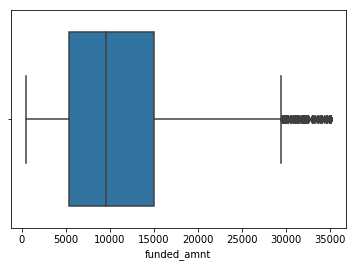

In [15]:
sns.boxplot(x=df_loan_records['funded_amnt'])

In [16]:
# Remove outliers in loan_amt and funded_amnt columns
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['funded_amnt'])) < 3)]
print(df_loan_records.shape)

(39111, 39)


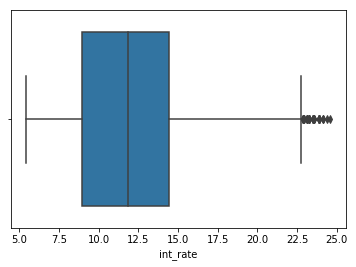

In [17]:
sns.boxplot(x=df_loan_records['int_rate'])

In [18]:
# Remove outliers in loan_amt and int_rate columns
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['int_rate'])) < 3)]
print(df_loan_records.shape)

(39069, 39)


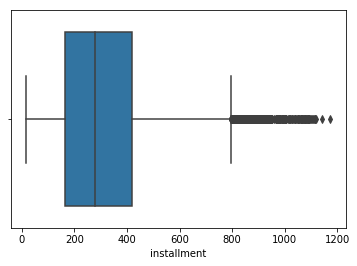

In [19]:
sns.boxplot(x=df_loan_records['installment'])

In [20]:
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['installment'])) < 3)]
print(df_loan_records.shape)

(38841, 39)


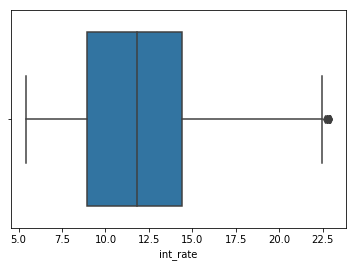

In [21]:
sns.boxplot(x=df_loan_records['int_rate'])

In [22]:
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['int_rate'])) < 3)]
print(df_loan_records.shape)

(38839, 39)


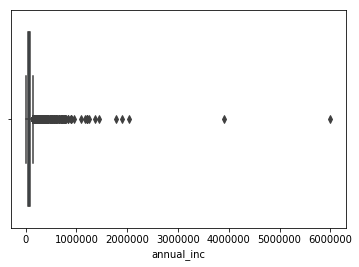

In [23]:
sns.boxplot(x=df_loan_records['annual_inc'])

In [24]:
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['annual_inc'])) < 3)]
print(df_loan_records.shape)

(38592, 39)


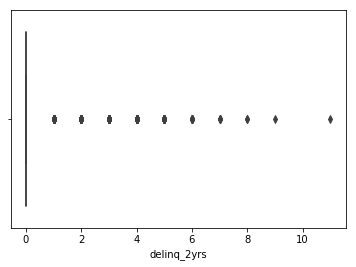

In [25]:
sns.boxplot(x=df_loan_records['delinq_2yrs'])

In [26]:
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['delinq_2yrs'])) < 3)]
print(df_loan_records.shape)

(37614, 39)


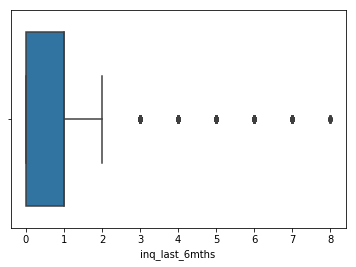

In [27]:
sns.boxplot(x=df_loan_records['inq_last_6mths'])

In [28]:
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['inq_last_6mths'])) < 3)]
print(df_loan_records.shape)

(37375, 39)


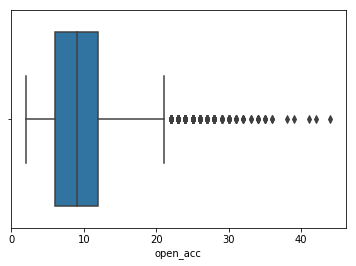

In [29]:
sns.boxplot(x=df_loan_records['open_acc'])

In [30]:
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['open_acc'])) < 3)]
print(df_loan_records.shape)

(37062, 39)


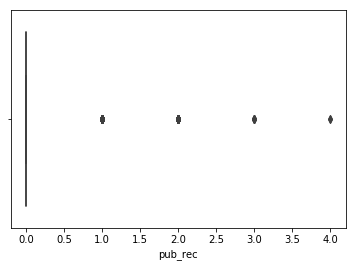

In [31]:
sns.boxplot(x=df_loan_records['pub_rec'])

In [32]:
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['pub_rec'])) < 3)]
print(df_loan_records.shape)

(35047, 39)


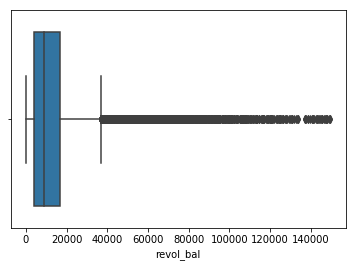

In [33]:
sns.boxplot(x=df_loan_records['revol_bal'])

In [34]:
df_loan_records = df_loan_records[(np.abs(stats.zscore(df_loan_records['revol_bal'])) < 3)]
print(df_loan_records.shape)

(34290, 39)


# Data Analysis - 


In [35]:
df_loan_records.to_excel("df_loan_records.xlsx", sheet_name='df_loan_records')

In [36]:
# Finding numerical features
numeric_data = df_loan_records.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = df_loan_records.select_dtypes(exclude = [np.number])

#Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))
print(numeric_data.columns)
print(categorical_data.columns)

# Fields to take consider id and memberid

There are 23 numerical and 16 categorical features in the training data
Index(['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')
Index(['id', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'funded_amnt_cat', 'annual_inc_cat'],
      dtype='object')


 Can be removed - 
ignoredcolumns = [
    'url', 'member_id', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv',
    'title','recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
    'last_pymnt_d', 'home_ownership'
]

1. Debt consolidation in purpose is ~49%

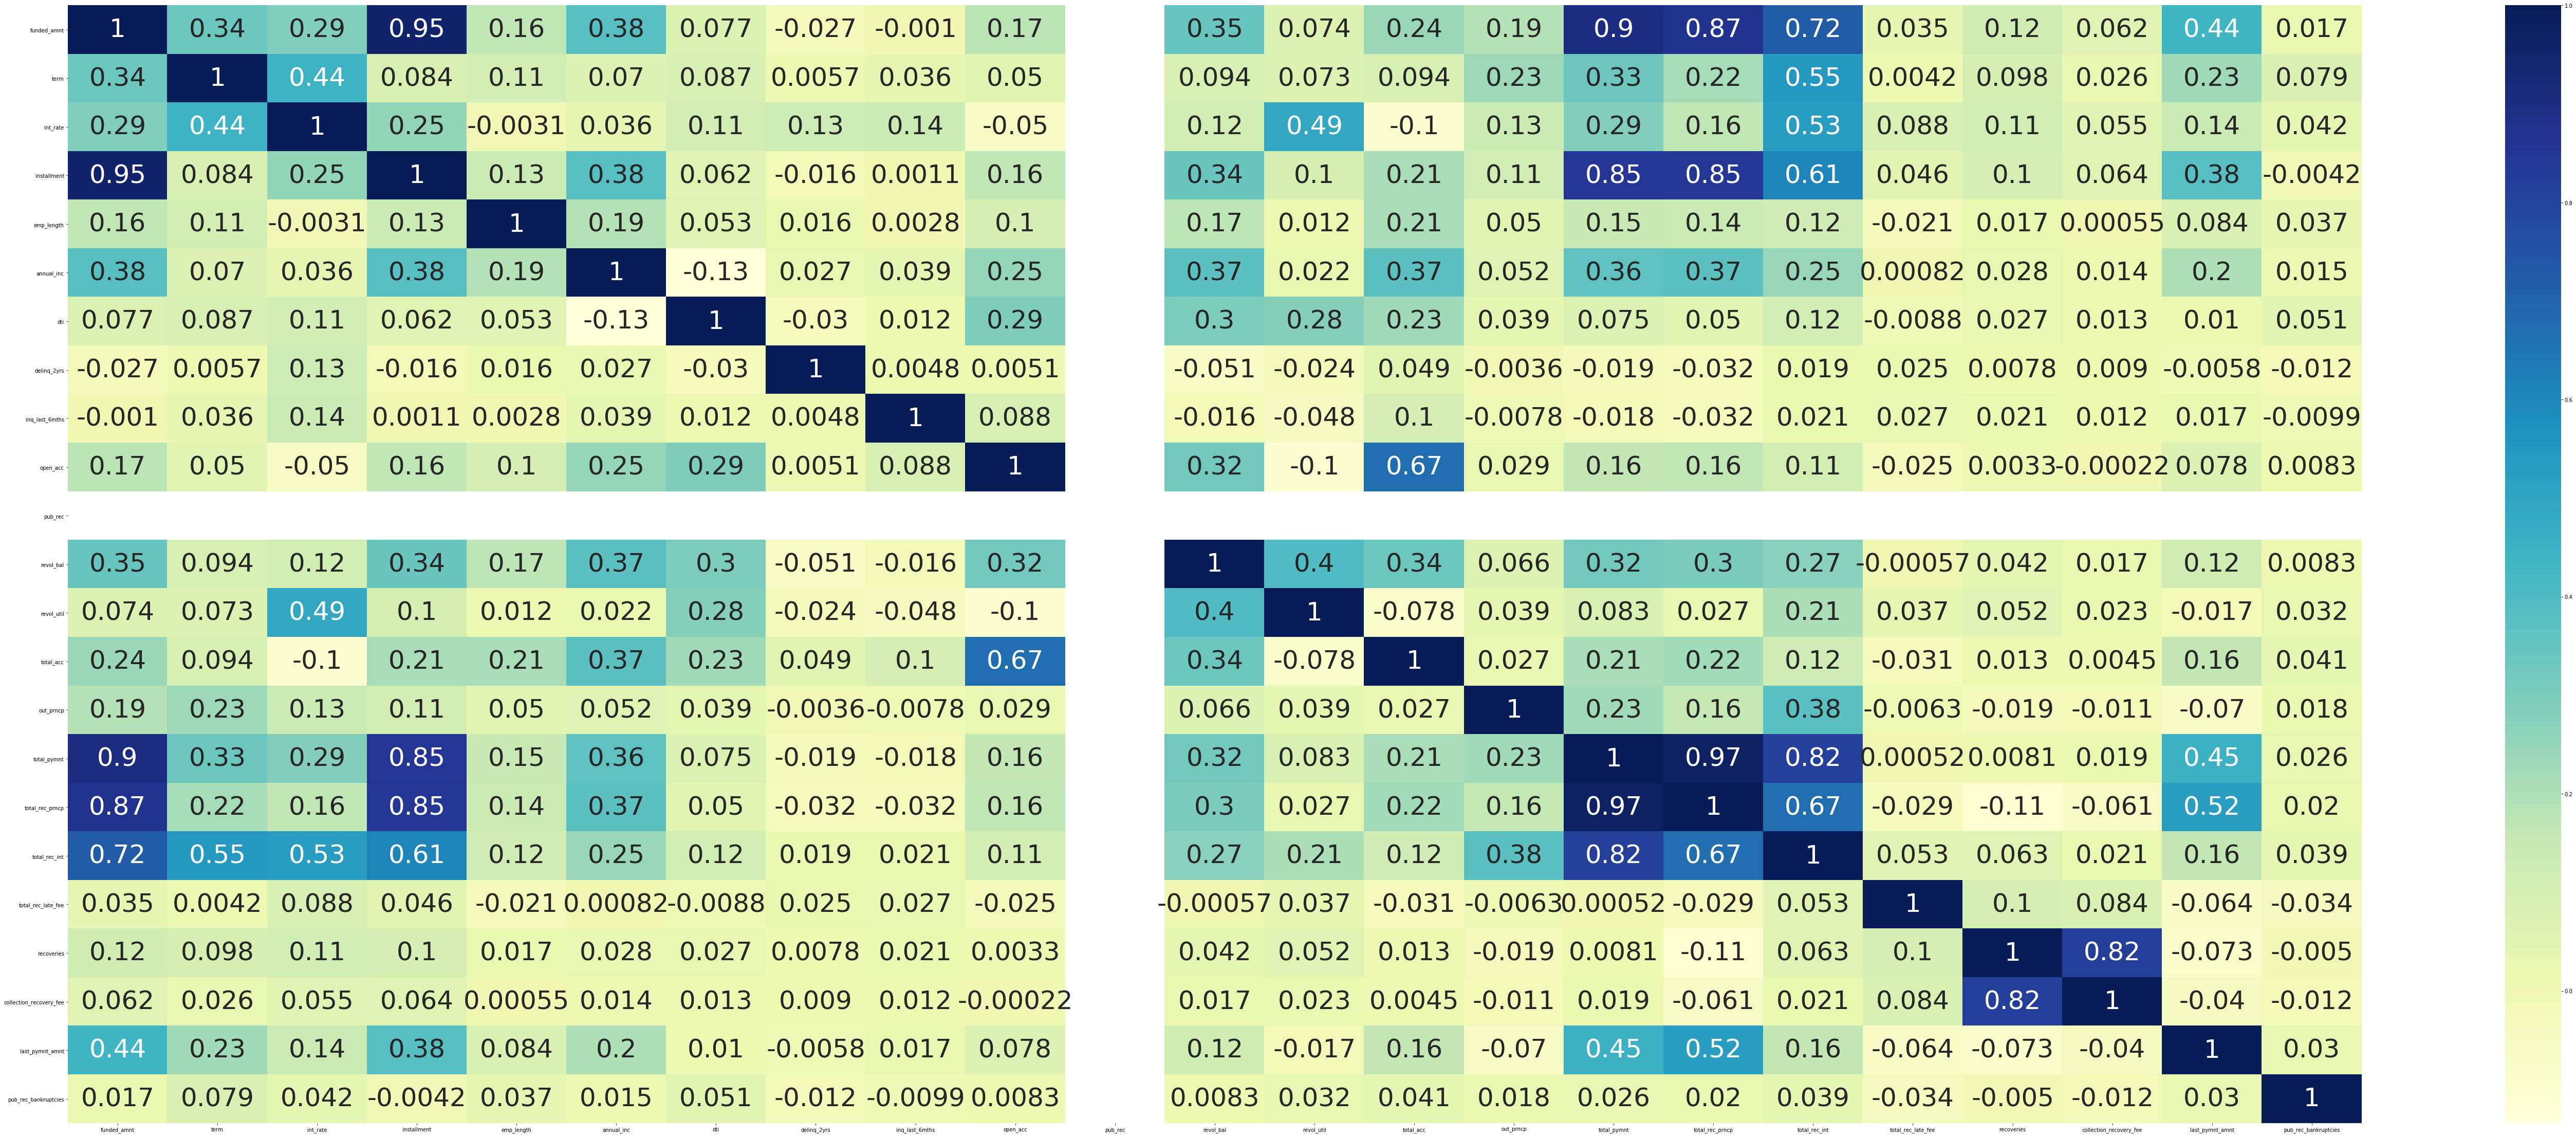

In [37]:
# Correlation plot of the features in numeric_data
corr = numeric_data.corr()
round(corr, 3)

# figure size
plt.figure(figsize=(100,40))
# x = np.random.normal(size=40)
# y = np.random.lognormal(size=40)

# heatmap
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.heatmap(corr, cmap="YlGnBu", annot=True,annot_kws={"fontsize":50})
# sns.set(font_scale=4)
plt.show()

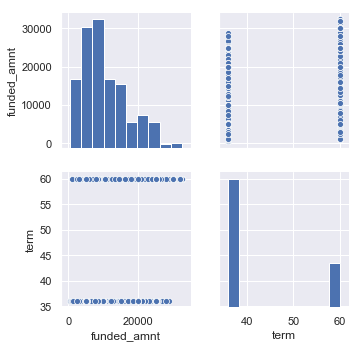

In [38]:
sns.set()
cols = ['funded_amnt', 'term', 'grade']
sns.pairplot(df_loan_records[cols], height=2.5)
plt.show()

In [39]:
# Drop columns where missing value is above threshod of 90%

#Missing value counts in each columns

missing_count = (df_loan_records.isnull().sum() / len(df_loan_records)) * 100

# Filter to find the missing count > 0

missing_count = missing_count[missing_count > 0]

print(missing_count.sort_values())

revol_util     0.13
last_pymnt_d   0.17
dtype: float64


In [40]:
def numerical_plot(colname, label): 
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    # Count Plot
    sns.distplot(df_loan_records.loc[df_loan_records[colname].notnull(), colname], kde=False, ax=ax1)
    ax1.set_xlabel(label)
    ax1.set_ylabel('Count')
    ax1.set_title(label)
    
    # Box Plot with loan status
    sns.boxplot(x=colname, y='loan_status', data=df_loan_records, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_title(label + ' by Loan Status')
    ax2.set_xlabel(label)
    
    plt.tight_layout()

In [41]:
def categorical_plot(colname, label): 
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    # Count Plot
    sns.countplot(df_loan_records[colname], order=sorted(df_loan_records[colname].unique()), color='#5975A4', ax=ax1)
    ax1.set_xlabel(label)
    ax1.set_ylabel('Count')
    ax1.set_title(label)
    plt.xticks(rotation=60)
    
    #Plot with loan status
    charge_off_rates = df_loan_records.groupby(colname)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
    sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', ax=ax2)
    ax2.set_ylabel('Charged-off of Loans')
    ax2.set_title('Charge-off Rate by ' + label)
    ax2.set_xlabel(label)
    
    plt.xticks(rotation=60)
    plt.tight_layout()

In [42]:
def categorical_plot_withinCat(colname,label):
    
    plt.figure(figsize=(12,4))
    plt.rcParams.update({'font.size': 8})
    charge_off_rates = df_loan_records[df_loan_records['loan_status'] == 'Charged Off'].groupby(['loan_status'])[colname].value_counts(normalize=True).loc['Charged Off']
    sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4')
    plt.title('Charge-off Rate within category ' + label)
    plt.xticks(rotation=60)
    plt.show()

In [43]:
#EDA of Key Attrubute and Features
#Loan Amount
df_loan_records['funded_amnt'].describe()

count   34290.00
mean    10430.21
std      6419.10
min       500.00
25%      5150.00
50%      9450.00
75%     14500.00
max     32500.00
Name: funded_amnt, dtype: float64

In [44]:
df_loan_records.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4624.00,11070.31,6870.81,900.00,5218.75,10000.00,15200.00,32350.00
Current,965.00,15442.77,7041.22,1000.00,10575.00,15000.00,20000.00,32350.00
Fully Paid,28701.00,10158.55,6242.99,500.00,5000.00,9000.00,14000.00,32500.00


/Users/sundar.shankar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


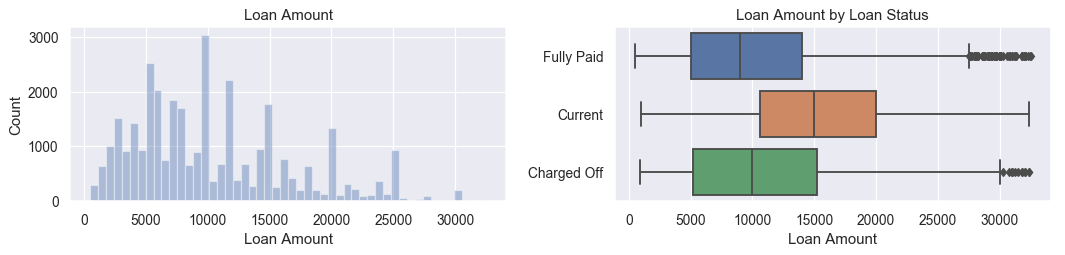

In [45]:
numerical_plot('funded_amnt', 'Loan Amount')

In [46]:
#Home Ownership
df_loan_records['home_ownership'].describe()

count     34290
unique        5
top        RENT
freq      17071
Name: home_ownership, dtype: object

In [47]:
df_loan_records.groupby('home_ownership')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership,,,,,,,,
MORTGAGE,14467.00,11589.58,6773.44,500.00,6000.00,10000.00,15262.50,32500.00
NONE,3.00,5600.00,3857.46,2800.00,3400.00,4000.00,7000.00,10000.00
OTHER,85.00,9927.35,5519.05,1000.00,5000.00,9000.00,15000.00,25000.00
OWN,2664.00,9641.80,6191.46,900.00,5000.00,8000.00,13312.50,32000.00
RENT,17071.00,9574.07,5981.83,500.00,5000.00,8000.00,12800.00,32275.00


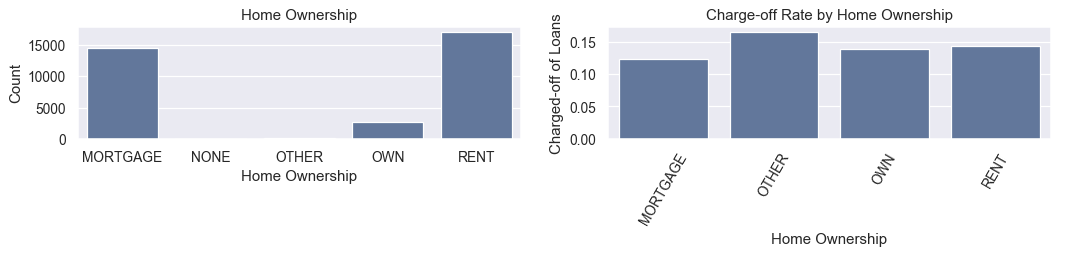

In [48]:
categorical_plot('home_ownership', 'Home Ownership')

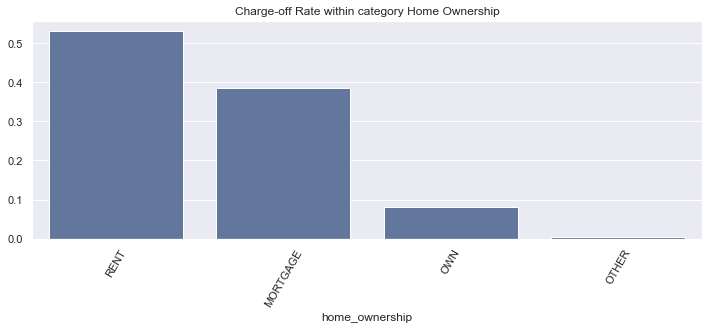

In [49]:
categorical_plot_withinCat('home_ownership', 'Home Ownership')

In [50]:
#Grade
df_loan_records['grade'].describe()

count     34290
unique        7
top           B
freq      10586
Name: grade, dtype: object

In [51]:
df_loan_records.groupby('grade')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,9501.00,8206.72,4644.74,500.00,5000.00,7200.00,10550.00,28800.00
B,10586.00,10656.39,6441.92,500.00,5500.00,10000.00,15000.00,32275.00
C,6787.00,10499.94,6444.00,700.00,5000.00,9600.00,15000.00,32400.00
D,4324.00,11537.28,6728.79,1000.00,6000.00,10000.00,15800.00,32000.00
E,2208.00,14117.02,7469.14,1000.00,8000.00,13987.50,20000.00,32350.00
F,721.00,16233.63,7740.56,1200.00,10000.00,16000.00,22000.00,32500.00
G,163.00,17460.74,7731.34,1600.00,12000.00,19000.00,24000.00,32000.00


In [52]:
df_loan_records.groupby('grade')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,9501.00,8206.72,4644.74,500.00,5000.00,7200.00,10550.00,28800.00
B,10586.00,10656.39,6441.92,500.00,5500.00,10000.00,15000.00,32275.00
C,6787.00,10499.94,6444.00,700.00,5000.00,9600.00,15000.00,32400.00
D,4324.00,11537.28,6728.79,1000.00,6000.00,10000.00,15800.00,32000.00
E,2208.00,14117.02,7469.14,1000.00,8000.00,13987.50,20000.00,32350.00
F,721.00,16233.63,7740.56,1200.00,10000.00,16000.00,22000.00,32500.00
G,163.00,17460.74,7731.34,1600.00,12000.00,19000.00,24000.00,32000.00


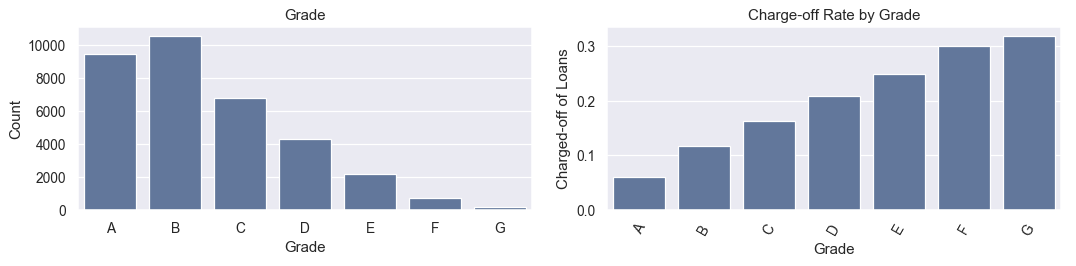

In [53]:
categorical_plot('grade', 'Grade')

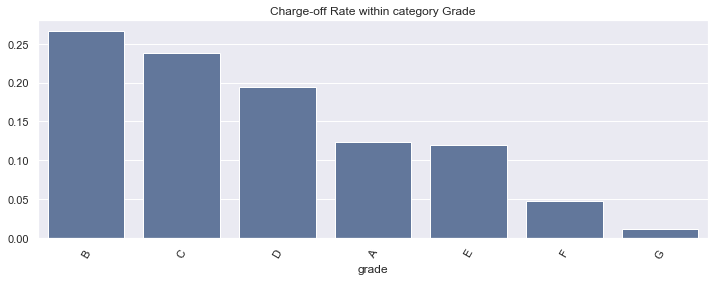

In [54]:
categorical_plot_withinCat('grade', 'Grade')

In [55]:
df_loan_records['sub_grade'].describe()

count     34290
unique       35
top          A4
freq       2671
Name: sub_grade, dtype: object

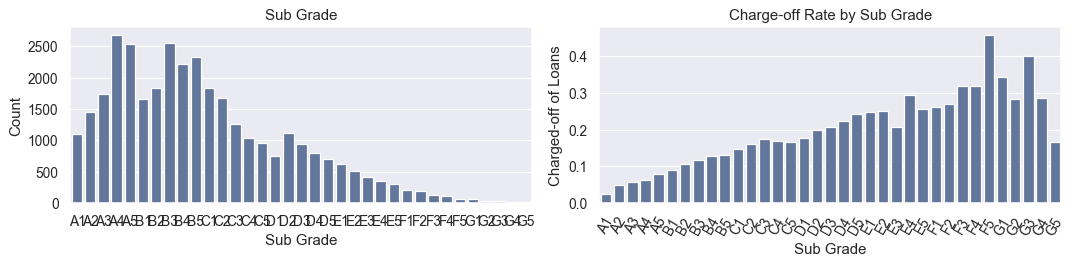

In [56]:
categorical_plot('sub_grade', 'Sub Grade')

In [57]:
#Drop Employee Title is better.
#Running for Employee Length
df_loan_records['emp_length'].describe()

count   34290.00
mean        4.71
std         3.56
min         0.00
25%         2.00
50%         4.00
75%         8.00
max        10.00
Name: emp_length, dtype: float64

In [58]:
df_loan_records['emp_length'].value_counts(dropna=False).sort_index()

0     4986
1     2885
2     3890
3     3659
4     3046
5     2893
6     1951
7     1526
8     1247
9     1081
10    7126
Name: emp_length, dtype: int64

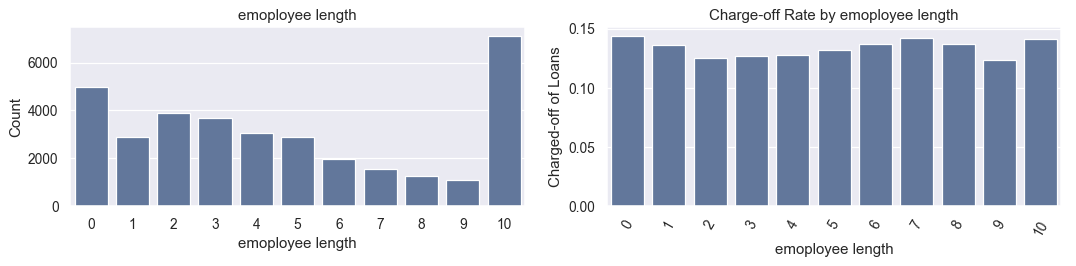

In [59]:
#Employee Length May be number but has discrete to it, so Only Categorical Plot
categorical_plot('emp_length', 'emoployee length')

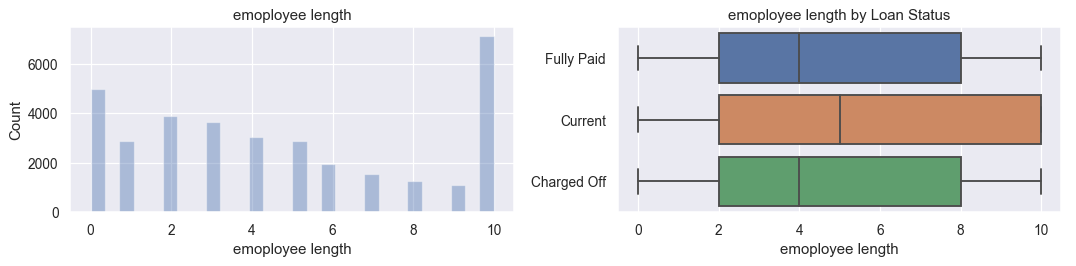

In [60]:
numerical_plot('emp_length', 'emoployee length')

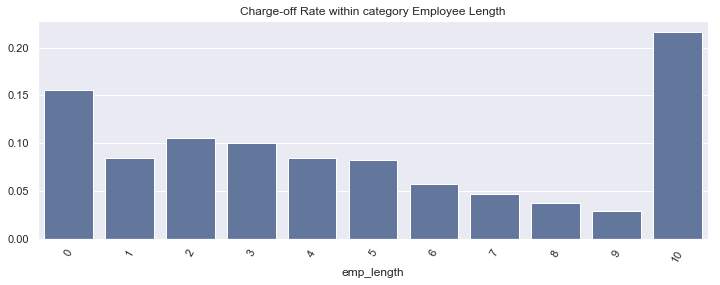

In [61]:
categorical_plot_withinCat('emp_length', 'Employee Length')

In [62]:
#verification Status
df_loan_records['verification_status'].describe()

count            34290
unique               3
top       Not Verified
freq             15020
Name: verification_status, dtype: object

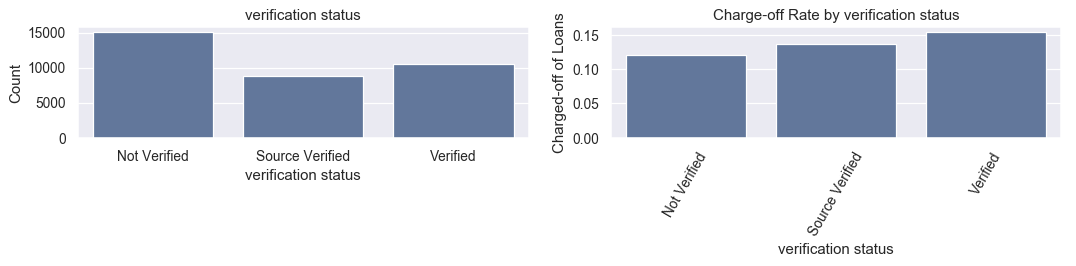

In [63]:
categorical_plot('verification_status', 'verification status')

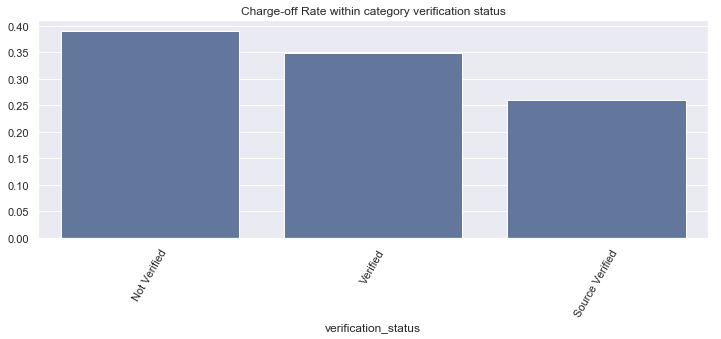

In [64]:
categorical_plot_withinCat('verification_status', 'verification status')

In [65]:
df_loan_records['purpose'].describe()

count                  34290
unique                    14
top       debt_consolidation
freq                   16125
Name: purpose, dtype: object

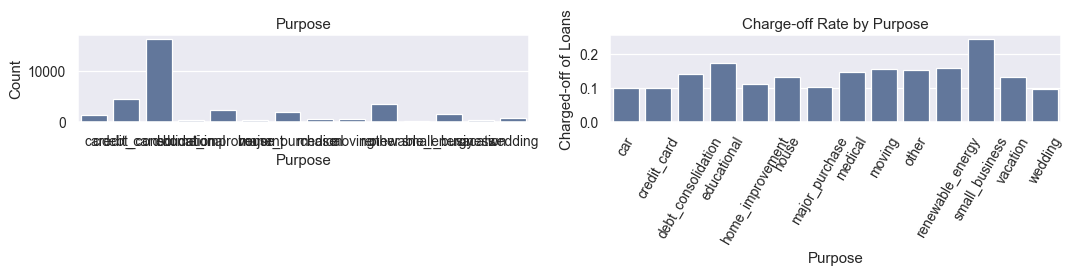

In [66]:
categorical_plot('purpose', 'Purpose')

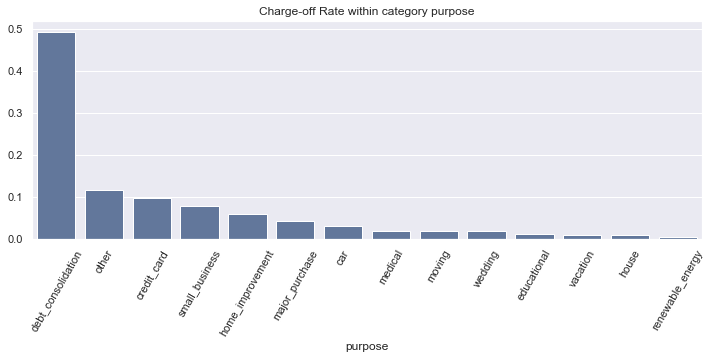

In [67]:
categorical_plot_withinCat('purpose', 'purpose')

In [68]:
df_loan_records['installment'].describe()

count   34290.00
mean      308.98
std       186.14
min        15.69
25%       164.80
50%       274.46
75%       411.67
max       897.06
Name: installment, dtype: float64

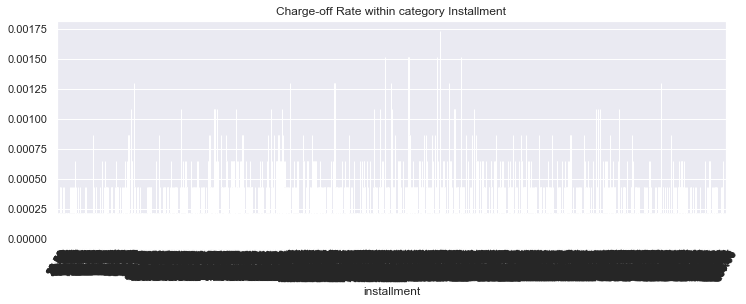

In [69]:
categorical_plot_withinCat('installment', 'Installment')

In [70]:
df_loan_records['addr_state'].describe()

count     34290
unique       50
top          CA
freq       6199
Name: addr_state, dtype: object

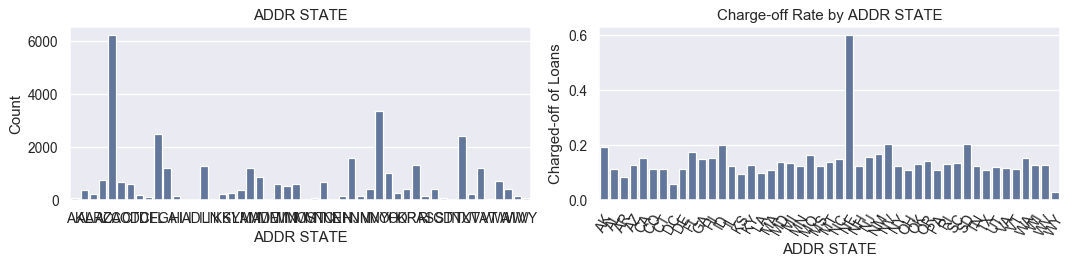

In [71]:
categorical_plot('addr_state', 'ADDR STATE')

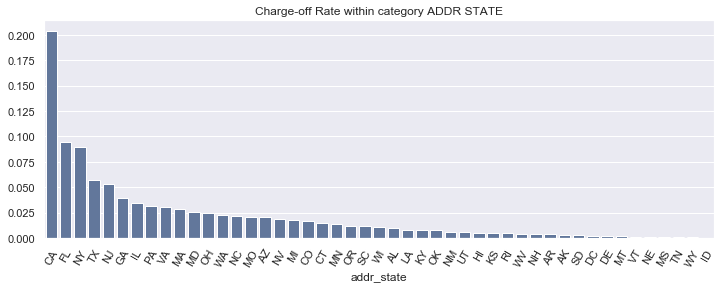

In [72]:
categorical_plot_withinCat('addr_state', 'ADDR STATE')

In [73]:
df_loan_records['pub_rec_bankruptcies'].describe()

count   34290.00
mean       -0.02
std         0.13
min        -1.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: pub_rec_bankruptcies, dtype: float64

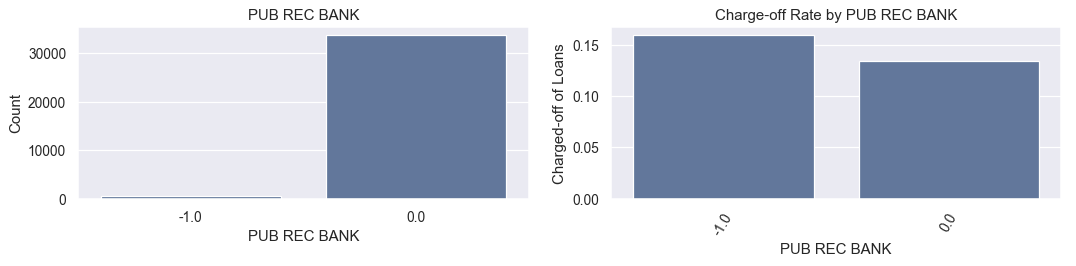

In [74]:
categorical_plot('pub_rec_bankruptcies', 'PUB REC BANK')

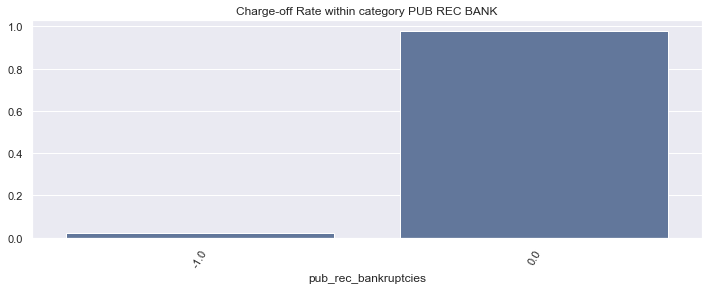

In [75]:
categorical_plot_withinCat('pub_rec_bankruptcies', 'PUB REC BANK')

In [76]:
df_loan_records.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4624.00,14.04,6.61,0.00,9.09,14.33,19.34,29.85
Current,965.00,14.82,6.74,0.00,9.88,14.98,20.11,29.95
Fully Paid,28701.00,13.14,6.69,0.00,7.96,13.18,18.38,29.99


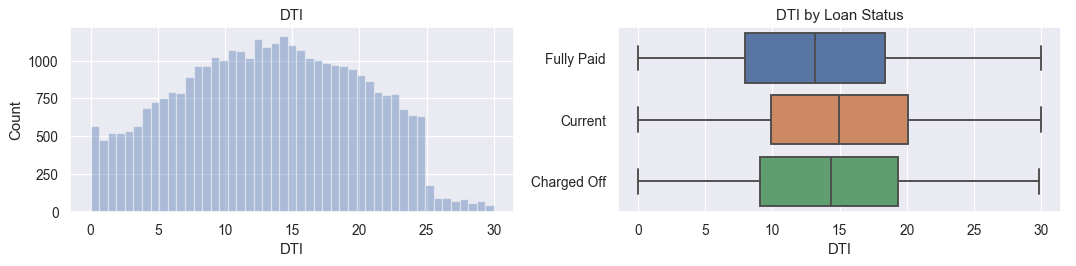

In [77]:
numerical_plot('dti','DTI')

In [78]:
df_loan_records.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4624.00,57329.81,31638.75,4080.00,36000.00,50004.00,70000.00,250000.00
Current,965.00,69951.56,35035.38,9960.00,46000.00,61000.00,85000.00,240000.00
Fully Paid,28701.00,64318.17,34398.61,4000.00,40000.00,57120.00,80000.00,255000.00


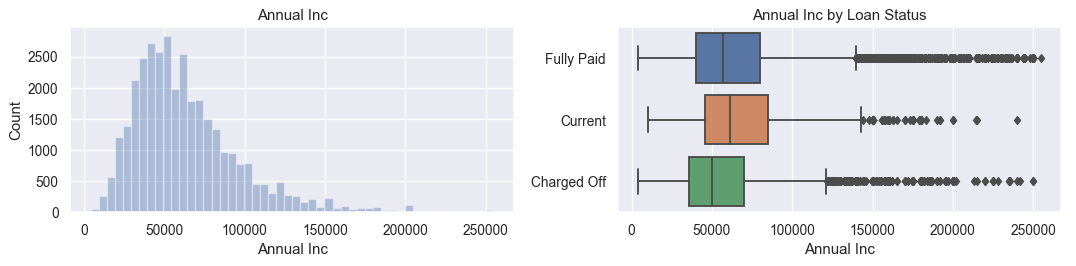

In [79]:
numerical_plot('annual_inc', 'Annual Inc')

In [80]:
df_loan_records.groupby('loan_status')['annual_inc_cat'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,4624,26,AnnualInc 3,799
Current,965,23,AnnualInc 4,156
Fully Paid,28701,26,AnnualInc 4,4276


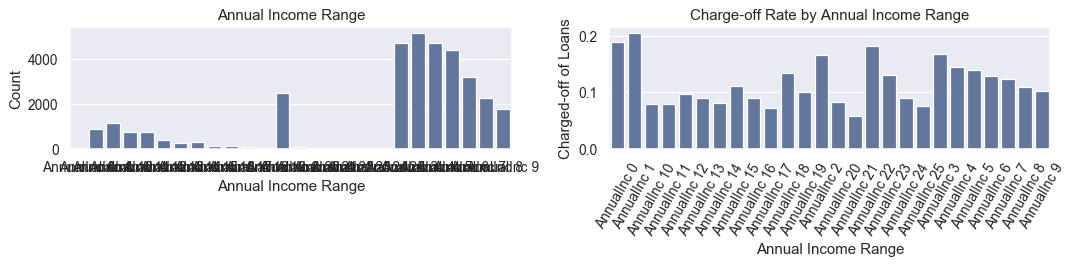

In [81]:
categorical_plot('annual_inc_cat', 'Annual Income Range')

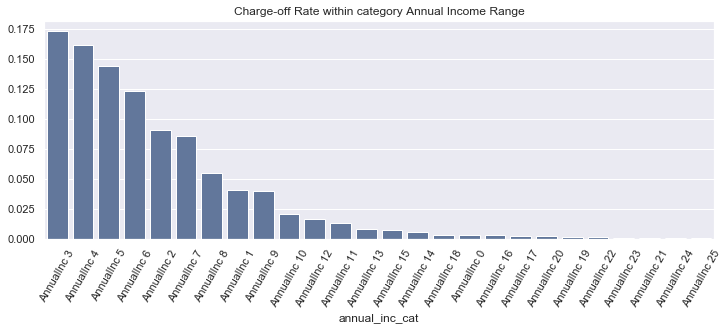

In [82]:
categorical_plot_withinCat('annual_inc_cat', 'Annual Income Range')

In [83]:
df_loan_records.groupby('loan_status')['funded_amnt_cat'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,4624,7,fundgrp 1,1370
Current,965,7,fundgrp 2,245
Fully Paid,28701,7,fundgrp 1,9492


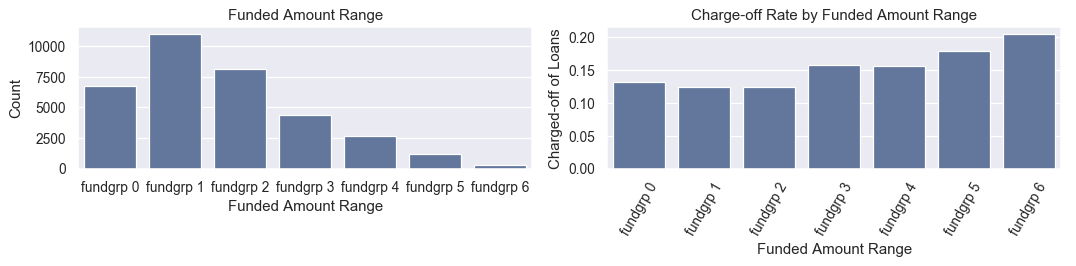

In [84]:
categorical_plot('funded_amnt_cat', 'Funded Amount Range')

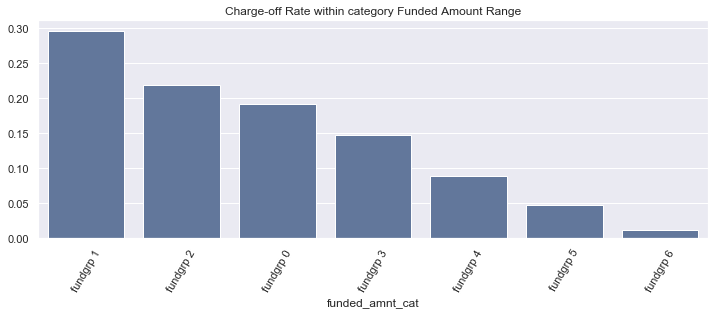

In [85]:
categorical_plot_withinCat('funded_amnt_cat', 'Funded Amount Range')

In [86]:
df_loan_records.groupby('loan_status')['term'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4624.00,46.06,11.84,36.00,36.00,36.00,60.00,60.00
Current,965.00,60.00,0.00,60.00,60.00,60.00,60.00,60.00
Fully Paid,28701.00,40.99,9.74,36.00,36.00,36.00,36.00,60.00


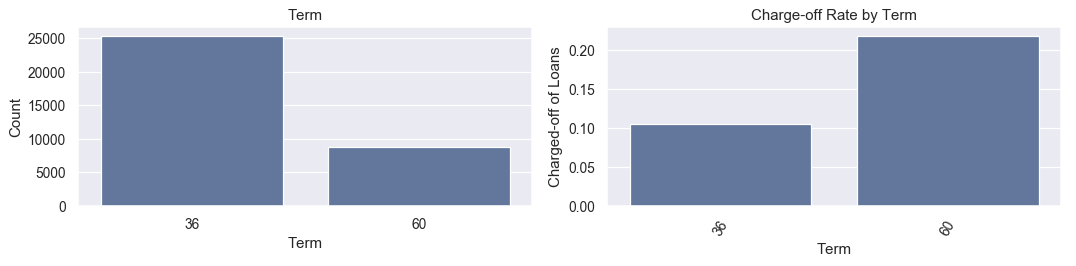

In [87]:
categorical_plot('term', 'Term')

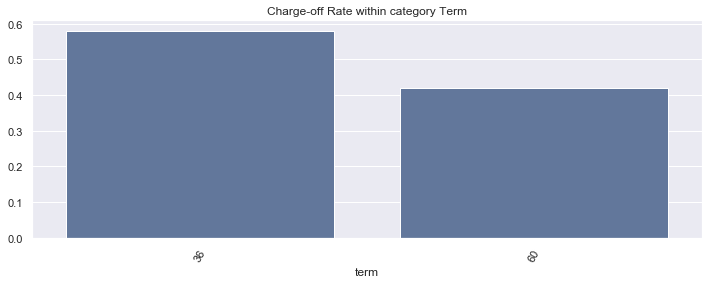

In [88]:
categorical_plot_withinCat('term', 'Term')

In [89]:
#Derived Column 2
df_loan_records['last_credit_pull_yr'] = df_loan_records['last_credit_pull_d'].dt.year

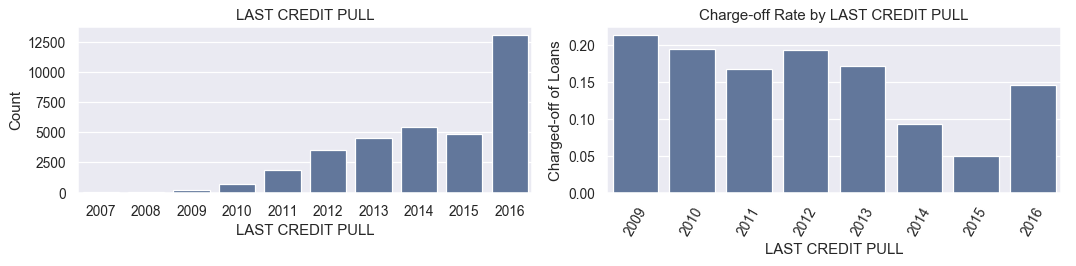

In [90]:
#last_credit_pull_d

categorical_plot('last_credit_pull_yr', 'LAST CREDIT PULL')

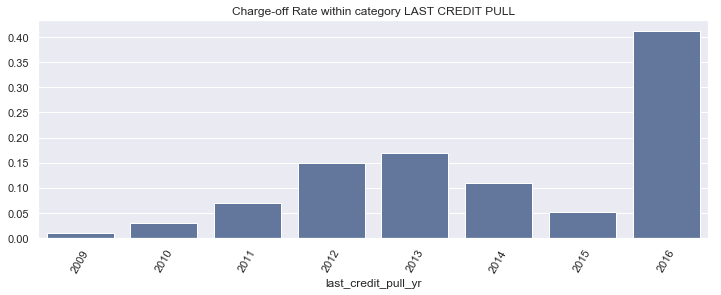

In [91]:
categorical_plot_withinCat('last_credit_pull_yr', 'LAST CREDIT PULL')

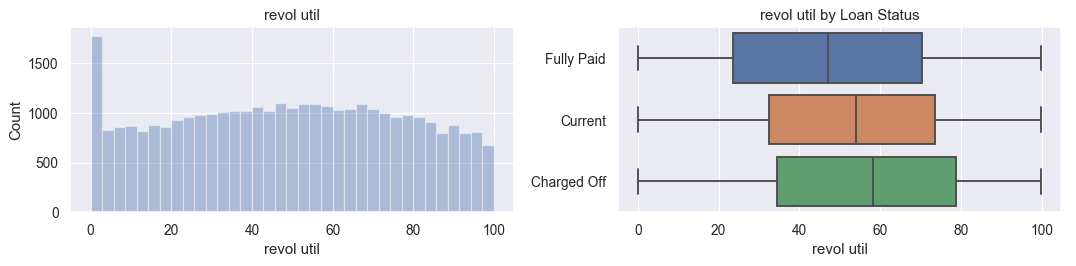

In [92]:
numerical_plot('revol_util','revol util')

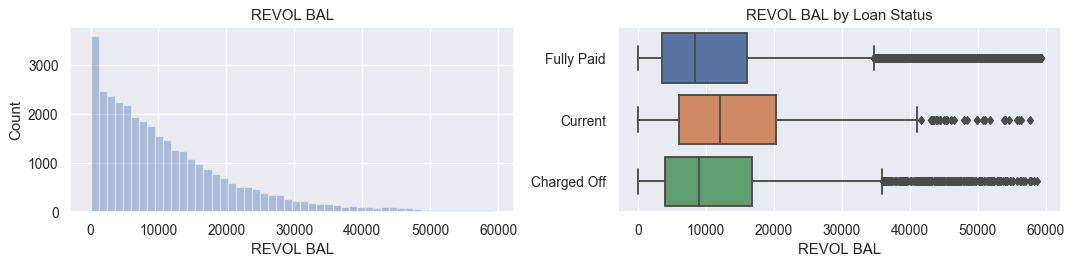

In [93]:
numerical_plot('revol_bal','REVOL BAL')

In [94]:
import scipy.stats
cat_features = categorical_data.columns

#Filling nulls with "missing" as value
df_loan_records[cat_features] = df_loan_records[cat_features].fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_amnt = []
    for group in df_loan_records[cat].unique():
        group_amnt.append(df_loan_records[df_loan_records[cat] == group]['funded_amnt'].values)
    f, p = scipy.stats.f_oneway(*group_amnt)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

/Users/sundar.shankar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2932: RuntimeWarning: divide by zero encountered in double_scalars
  msw = sswn / float(dfwn)


In [95]:
anova

,feature,f,p
1,grade,507.23,0.00
2,sub_grade,105.42,0.00
5,verification_status,3401.19,0.00
8,purpose,257.75,0.00
14,funded_amnt_cat,118824.05,0.00
15,annual_inc_cat,286.03,0.00
11,earliest_cr_line,4.79,0.00
12,last_pymnt_d,14.74,0.00
4,home_ownership,209.47,0.00
6,issue_d,17.62,0.00


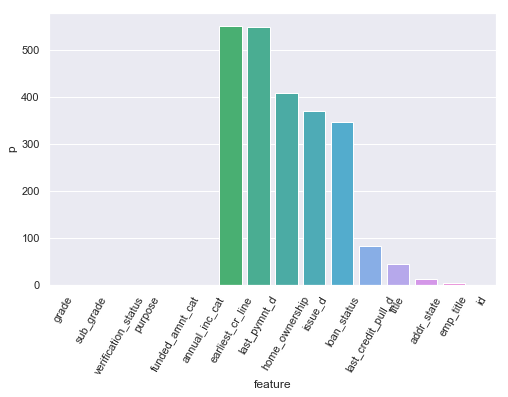

In [96]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=60)
plt.show()

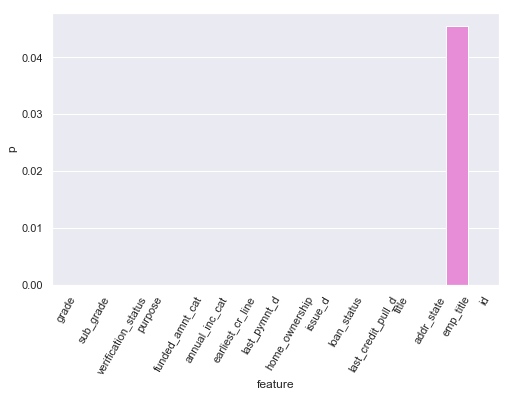

In [97]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, anova['p'])
plt.xticks(rotation=60)
plt.show()

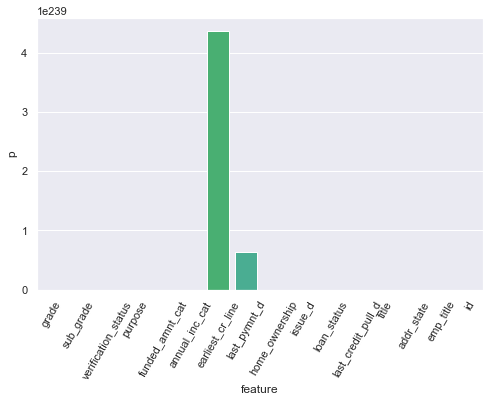

In [98]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, 1/anova['p'])
plt.xticks(rotation=60)
plt.show()

In [99]:
#sns.pairplot(df_loan_records[numeric_data.columns],size=25)
#plt.show()